In [27]:
import numpy as np
def mod2pi(phaseout):
    y = phaseout
    two_pi = 2 * np.pi
    while (y >= np.pi):
        y -= two_pi
    while (y < np.pi):
        y+= two_pi
    return y

In [28]:
# To get the magnitude and phase response for a filtered signal
import numpy as np
from scipy import signal
import math as mt
import matplotlib.pyplot as plt
B = [1,1]
A = [1]
gain, phases = [], []

N = 10
fs = 1
fmax = fs/2
df = fmax/(N - 1)
f = np.arange(0,fmax,df) #This is a numpy array
dt = 1/fs
tmax = 10
t = np.arange(0,tmax,dt)
ampin = 1
phasin = 0
ntransient = len(A)- 1

for k in f:
    s = ampin*np.cos((2 * (np.pi) * k * t) + phasin)
    y = signal.lfilter(B,A,s)
    yss = y[ntransient + 1:len(y)]  
    ampout = max(yss)
    for j in range(len(yss)):
        if yss[j] == ampout:
            peakloc = j
    gain.append(ampout/ampin)
    sphase = 2 * np.pi * k * (peakloc + 1)
    phase_out = mt.acos(yss[peakloc] / ampout) - sphase
    phase_out = mod2pi(phase_out)
    phases.append(phase_out - phasin)


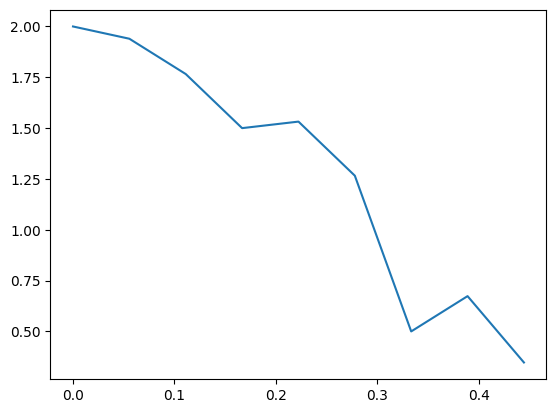

In [29]:
plt.plot(f,gain)

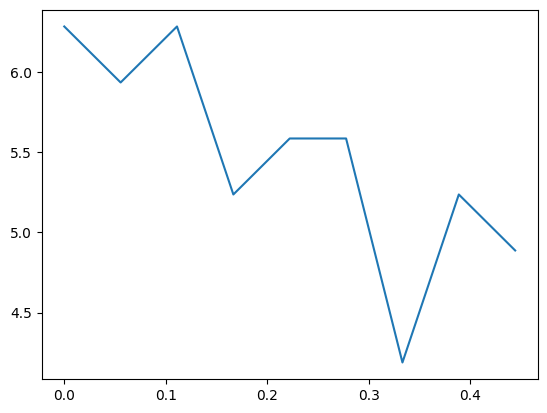

In [30]:
plt.plot(f,phases)